# TAHLR Week 6: Gaining early insights

Code notebook for TAHLR course at ISAW (Fall 2023) based on Albrecht et al. 2022 (Blueprints) Ch. 1: Gaining Early Insights from Textual Data

In [25]:
# # Installs
#! pip install -U seaborn
#! pip install -U textacy
#! pip install wordcloud

In [26]:
# # Get data from remote location

!mkdir -p ../data/blueprints
!curl -LJO https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/data/un-general-debates/un-general-debates-blueprint.csv.gz --output-dir ../data/blueprints

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 42.7M  100 42.7M    0     0  9744k      0  0:00:04  0:00:04 --:--:-- 11.8M


In [27]:
# Imports

import random
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("darkgrid")

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katherinethomson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# Load data

file = "../data/blueprints/un-general-debates-blueprint.csv.gz"
df = pd.read_csv(file)
df.sample(2)

,session,year,country,country_name,speaker,position,text
3488,49,1994,LIE,Liechtenstein,Ms. Andrea Willi,Minister for Foreign Affairs,"At the outset, let me\ncongratulate you, Sir, ..."
4543,55,2000,KAZ,Kazakhstan,Erlan Idrissov,Minister for Foreign Affairs,The current political\ndebate is taking place ...


## Getting an overview of the data with Pandas

In [29]:
df.shape

(7507, 7)

In [30]:
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')

In [31]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
dtype: object

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.7+ KB


In [33]:
df.describe()

,session,year
count,7507.000000,7507.000000
mean,49.610763,1994.610763
std,12.892155,12.892155
min,25.000000,1970.000000
25%,39.000000,1984.000000
50%,51.000000,1996.000000
75%,61.000000,2006.000000
max,70.000000,2015.000000


In [34]:
df.describe(include='O')

,country,country_name,speaker,position,text
count,7507,7507,7480,4502,7507
unique,199,199,5428,113,7507
top,ALB,Albania,Seyoum Mesfin,Minister for Foreign Affairs,33: May I first convey to our President the co...
freq,46,46,12,1813,1


In [35]:
# Get selection

df.sample(frac=0.1)

,session,year,country,country_name,speaker,position,text
6989,68,2013,GEO,Georgia,Mikheil Saakashvili,President,It is a great honour to once \nagain represent...
5357,59,2004,SLV,El Salvador,Mr. Elías Antonio Saca González,President,It\nis my great honour to represent the Salvad...
5647,61,2006,GRC,Greece,Mrs. Dora BAKOYANNIS,Minister for Foreign Affairs,"Allow me, Madam, to \nadd my heartiest congrat..."
891,32,1977,LAO,Lao People's Democratic Republic,SIPRASEUTH,NaN,﻿47.\t On behalf of the\nLao People's Democra...
22,25,1970,GTM,Guatemala,Mr. HERRERA IBARGUEN,NaN,"196.\t: Before starting my statement may I, by..."
...,...,...,...,...,...,...,...
6373,65,2010,BRB,Barbados,Maxine Pamela Ometa McClean,Minister for Foreign Affairs,I am honoured to \naddress the General Assemb...
3389,48,1993,ZWE,Zimbabwe,MR. ROBERT G. MUGABE,President,"Allow me to begin by\ncongratulating you, Your..."
1821,38,1983,UGA,Uganda,PICHO OWINY,NaN,"﻿111.\tI extend to you, Sir, warm congratulati..."
45,25,1970,NOR,Norway,Mr. STRAY,NaN,"113.\t Mr. President, I am happy to congratula..."


In [36]:
df['length'] = df['text'].str.len()
df.head(5)

,session,year,country,country_name,speaker,position,text,length
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


In [38]:
df[['country', 'speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


In [39]:
## Check for missing data

df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [40]:
# Fill na for speaker

df['speaker'].fillna('unknown', inplace=True)

<Axes: >

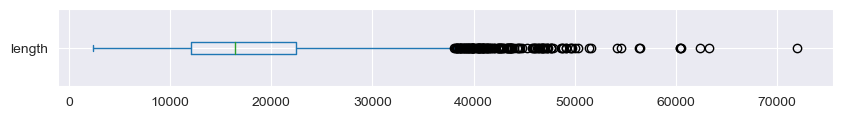

In [41]:
# Plotting value distributions

df['length'].plot(kind='box', vert=False, figsize=(10, 1))

<Axes: ylabel='Frequency'>

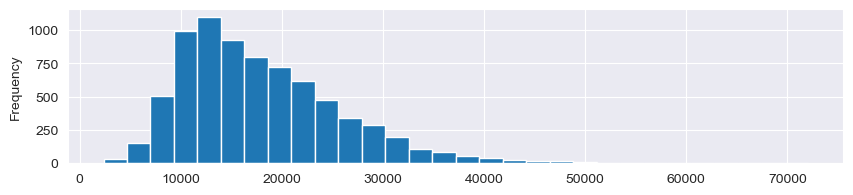

In [42]:
df['length'].plot(kind='hist', bins=30, figsize=(10, 2))

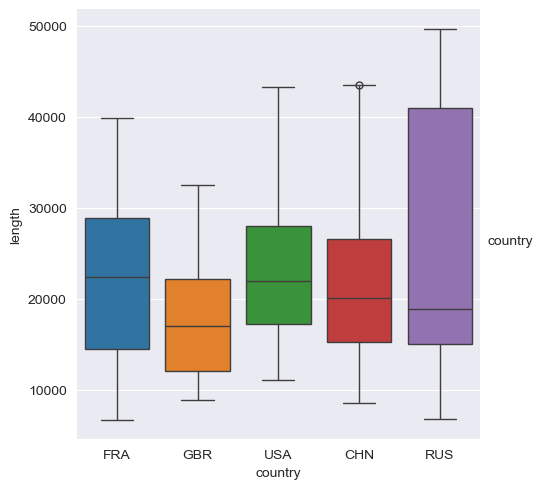

In [43]:
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
cp = sns.catplot(data=df[where], x="country", y="length", kind='box', hue='country')

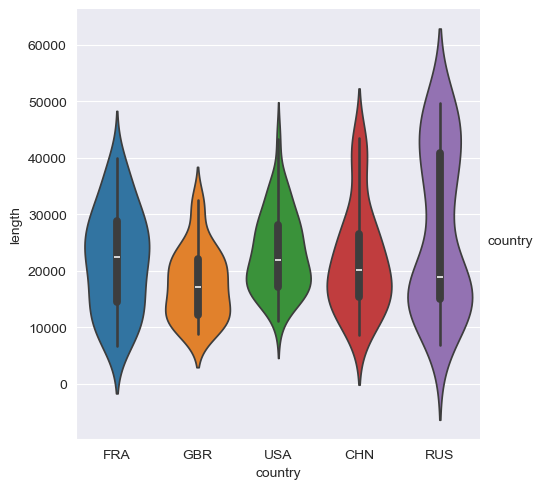

In [44]:
vp = sns.catplot(data=df[where], x="country", y="length", kind='violin', hue='country')

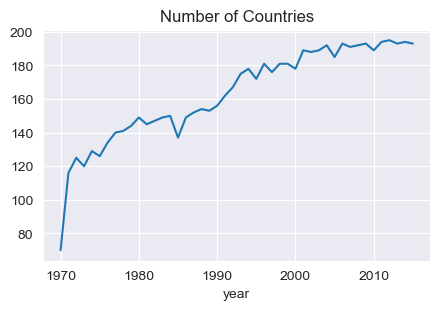

In [45]:
## Visualizing Developments Over Time

df.groupby('year').size().plot(title="Number of Countries", figsize=(5, 3));

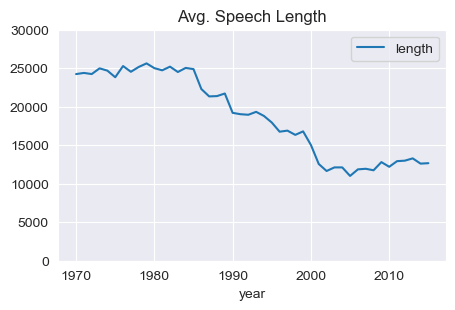

In [46]:
df.groupby('year').agg({'length': 'mean'}).plot(title="Avg. Speech Length", ylim=(0,30000), figsize=(5, 3));

## Blueprint: Building a simple text preprocessing pipeline

In [47]:
# Tokenization

import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [48]:
text = "Let's defeat SARS-CoV-2 together in 2020!"
tokens = tokenize(text)
print("|".join(tokens))

Let|s|defeat|SARS-CoV-2|together|in


In [49]:
# Stop words

import nltk

stopwords = set(nltk.corpus.stopwords.words('english'))

In [50]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [51]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [52]:
text = "Let's defeat SARS-CoV-2 together in 2020!"
print(prepare(text, pipeline))

['let', 'defeat', 'sars-cov-2', 'together']


In [53]:
df['text'].apply(str.upper)

0       33: MAY I FIRST CONVEY TO OUR PRESIDENT THE CO...
1       177.\t : IT IS A FORTUNATE COINCIDENCE THAT PR...
2       100.\t  IT IS A PLEASURE FOR ME TO EXTEND TO Y...
3       155.\t  MAY I BEGIN BY EXPRESSING TO AMBASSADO...
4       176. NO DOUBT EACH OF US, BEFORE COMING UP TO ...
                              ...                        
7502    ON BEHALF OF THE PEOPLE AND THE GOVERNMENT OF ...
7503    \nSEVENTY YEARS HAVE PASSED SINCE THE ESTABLIS...
7504    I SHOULD LIKE TO CONGRATULATE THE PRESIDENT AN...
7505    I WOULD LIKE TO BEGIN BY THANKING THE SECRETAR...
7506    ALLOW ME AT THE OUTSET TO EXTEND TO MR. MOGENS...
Name: text, Length: 7507, dtype: object

In [54]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [55]:
df['num_tokens'] = df['tokens'].map(len)

In [56]:
df.head(5)

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419,"[may, first, convey, president, congratulation...",4092
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286,"[fortunate, coincidence, precisely, time, unit...",2341
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839,"[pleasure, extend, mr, president, warmest, con...",2575
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616,"[may, begin, expressing, ambassador, hambro, b...",2166
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911,"[doubt, us, coming, rostrum, wonders, usefulne...",2064


## Blueprint: Counting words with a Counter

In [57]:
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa.")

counter = Counter(tokens)
print(counter)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [58]:
more_tokens = tokenize("She likes dogs and cats.")
counter.update(more_tokens)
print(counter)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [59]:
counter = Counter()

df['tokens'].map(counter.update);

In [60]:
counter.most_common(10)

[('nations', 124508),
 ('united', 120763),
 ('international', 117223),
 ('world', 89421),
 ('countries', 85734),
 ('peace', 72625),
 ('development', 62632),
 ('states', 59713),
 ('people', 59338),
 ('security', 58425)]

In [61]:
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'

    return freq_df.sort_values('freq', ascending=False)

In [62]:
freq_df = count_words(df)
freq_df.head(5)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


In [63]:
count_words(df, column='text',
                preprocess=lambda text: re.findall(r"\w{10,}", text)).head(5)


,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177


## Blueprint: Counting a frequency diagram

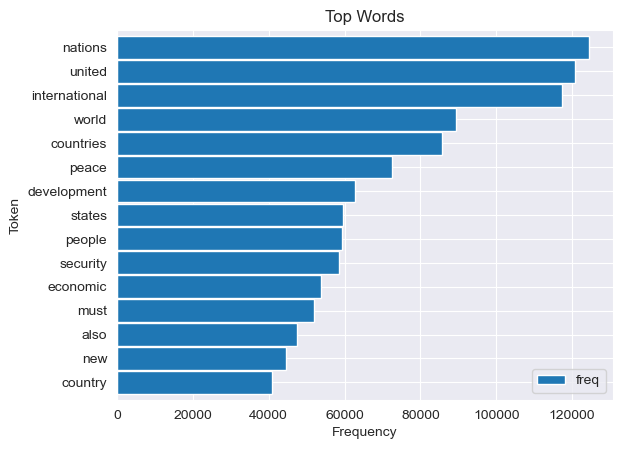

In [64]:
ax = freq_df.head(15).plot(kind='barh', width=0.95)
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words');

## Blueprint: Counting word clouds

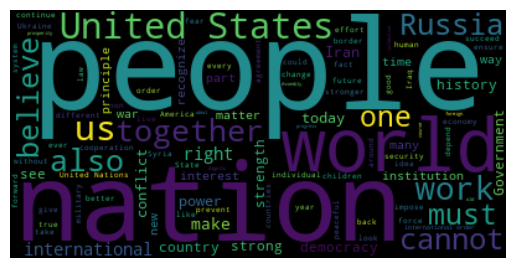

In [65]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = df.query("year==2015 and country=='USA'")['text'].values[0]

wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

In [66]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400,
                   background_color= "black", colormap="Paired",
                   max_font_size=150, max_words=max_words)

    # convert DataFrame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items()
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)

    plt.title(title)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

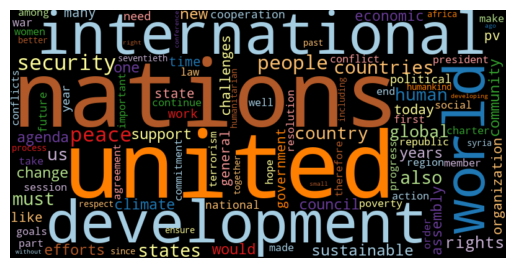

In [67]:
freq_2015_df = count_words(df[df['year']==2015])
plt.figure()
wordcloud(freq_2015_df['freq'], max_words=100)

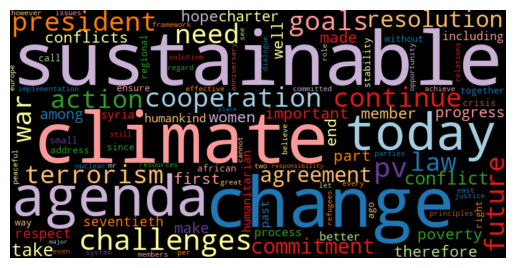

In [68]:
wordcloud(freq_2015_df['freq'], max_words=100, stopwords=freq_df.head(50).index)

## Blueprint: Ranking with TF-IDF

In [69]:
def compute_idf(df, column='tokens', preprocess=None, min_df=2):

    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    # count tokens
    counter = Counter()
    df[column].map(update)

    # create DataFrame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df

In [70]:
idf_df = compute_idf(df)

/var/folders/03/m74305793q5bl8b7rdffkwpm0000gn/T/ipykernel_53598/4234653083.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1


In [71]:
idf_df

,df,idf
token,,
liberation,2097,1.375328
committing,298,3.326498
disposal,591,2.641775
violence,3359,0.904193
recall,1486,1.719748
...,...,...
tatars,3,7.924979
decarbonization,2,8.330444
fit-for-purpose,2,8.330444


In [72]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

In [73]:
freq_df['tfidf'].head()

token
nations          12649.986284
united           12285.608632
international    12364.276226
world             9503.708982
countries        10888.485986
Name: tfidf, dtype: float64

In [74]:
freq_1970 = count_words(df[df['year'] == 1970])
freq_2015 = count_words(df[df['year'] == 2015])

freq_1970['tfidf'] = freq_1970['freq'] * idf_df['idf']
freq_2015['tfidf'] = freq_2015['freq'] * idf_df['idf']

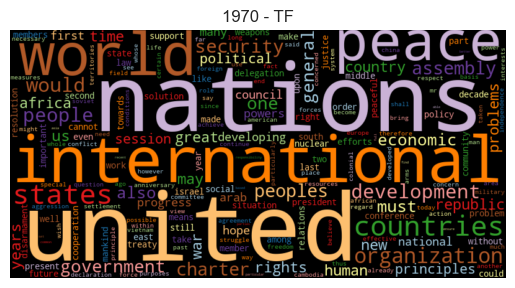

In [75]:
wordcloud(freq_1970['freq'], title='1970 - TF',
          stopwords=['twenty-fifth', 'twenty-five'])

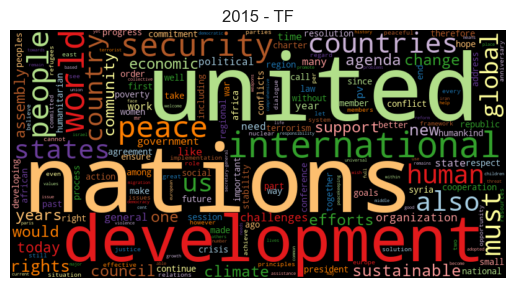

In [76]:
wordcloud(freq_2015['freq'], title='2015 - TF',
          stopwords=['seventieth'])

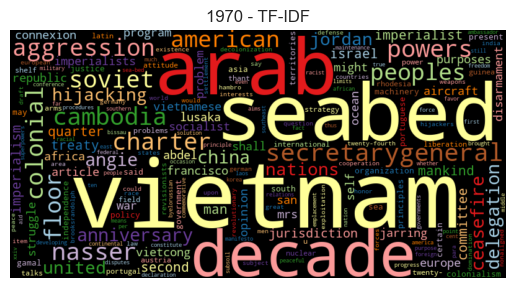

In [77]:
wordcloud(freq_1970['tfidf'], title='1970 - TF-IDF',
          stopwords=['twenty-fifth', 'twenty-five', 'twenty', 'fifth'])

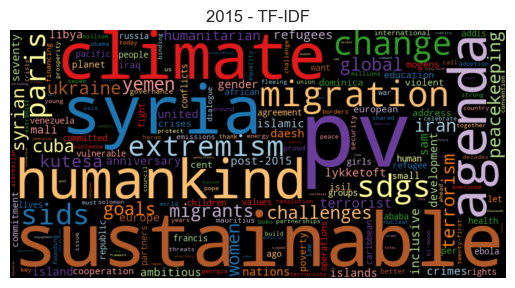

In [78]:
wordcloud(freq_2015['tfidf'], title='2015 - TF-IDF',
          stopwords=['seventieth'])

## Blueprint: Finding a keyword-in-context

In [79]:
# from textacy.text_utils import KWIC

from textacy.extract import keyword_in_context

def kwic(doc_series, keyword, window=35, print_samples=5):

    def add_kwic(text):
        kwic_list.extend(keyword_in_context(text, keyword, ignore_case=True,
                              window_width=window))

    kwic_list = []
    doc_series.map(add_kwic)

    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0])+'  '+ \
                  sample[1]+'  '+\
                  re.sub(r'[\n\t]', ' ', sample[2]))

In [80]:
kwic(df[df['year'] == 2015]['text'], 'sdgs', print_samples=5)

5 random samples out of 73 contexts for 'sdgs':
the Sustainable Development Goals (  SDGs  ). I am confident that the invaluab
a necessarily ambitious vision and   SDGs  . We have no doubt of the complexit
 of Sustainable Development Goals (  SDGs  ). Given the ambition reflected in 
the Sustainable Development Goals (  SDGs  ) will depend on revitalized and en
the Sustainable Development Goals (  SDGs  ) contained therein, along with the


## Blueprint: Analyzing n-grams

In [81]:
def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
print("\n".join(ngrams(tokens, 2)))

the visible
visible manifestation
manifestation of
of the
the global
global climate
climate change


In [82]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
            if len([t for t in ngram if t in stopwords])==0]

print("Bigrams:", "|".join(ngrams(tokens, 2, stopwords=stopwords)))
print("Trigrams:", "|".join(ngrams(tokens, 3, stopwords=stopwords)))

Bigrams: visible manifestation|global climate|climate change
Trigrams: global climate change


In [83]:
df['bigrams'] = df['text'].apply(prepare, pipeline=[str.lower, tokenize]) \
                          .apply(ngrams, n=2, stopwords=stopwords)

count_words(df, 'bigrams').head(5)

,freq
token,
united nations,103236
international community,27786
general assembly,27096
security council,20961
human rights,19856


/var/folders/03/m74305793q5bl8b7rdffkwpm0000gn/T/ipykernel_53598/4234653083.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1


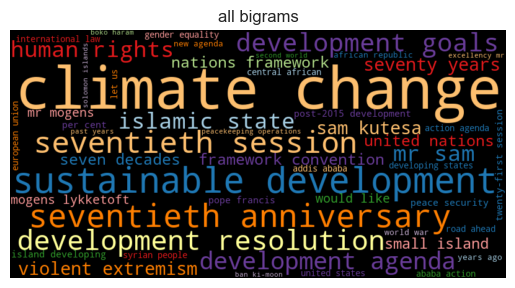

In [84]:
# concatenate existing IDF DataFrame with bigram IDFs
idf_df = pd.concat([idf_df, compute_idf(df, 'bigrams', min_df=10)]);

freq_df = count_words(df[df['year'] == 2015], 'bigrams');
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf'];
wordcloud(freq_df['tfidf'], title='all bigrams', max_words=50)

## Blueprint: Comparing frequencies across time intervals and categories

In [85]:
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [86]:
keywords = ['nuclear', 'terrorism', 'climate', 'freedom']
tokens = ['nuclear', 'climate', 'climate', 'freedom', 'climate', 'freedom']

print(count_keywords(tokens, keywords))

[1, 0, 3, 2]


In [87]:
def count_keywords_by(df, by, keywords, column='tokens'):

    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)

    return freq_df.groupby(by=by).sum().sort_values(by)

In [88]:
freq_df = count_keywords_by(df, by='year', keywords=keywords)

In [89]:
freq_df.head()

,nuclear,terrorism,climate,freedom
year,,,,
1970,192,7,18,128
1971,275,9,35,205
1972,393,379,74,280
1973,347,124,79,266
1974,478,24,71,316


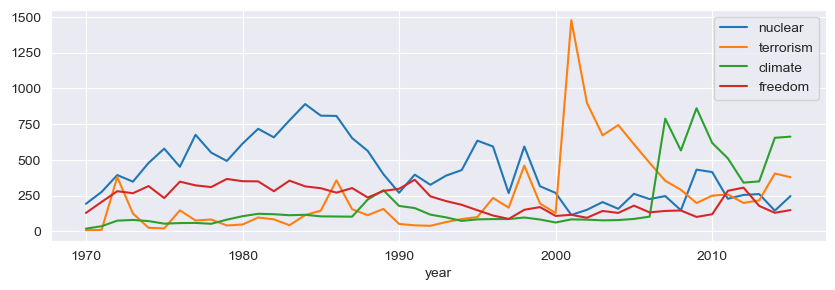

In [90]:
freq_df.plot(kind='line', figsize=(10,3));

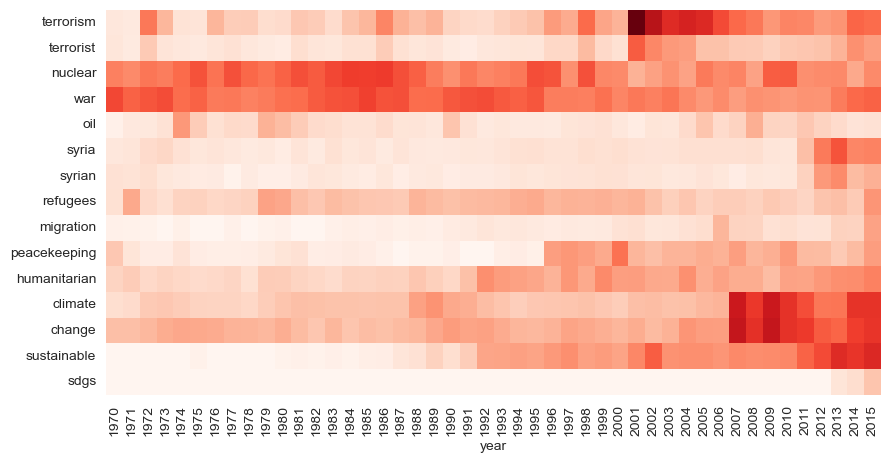

In [91]:
keywords = ['terrorism', 'terrorist', 'nuclear', 'war', 'oil',
            'syria', 'syrian', 'refugees', 'migration', 'peacekeeping',
            'humanitarian', 'climate', 'change', 'sustainable', 'sdgs']

freq_df = count_keywords_by(df, by='year', keywords=keywords)

# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)

plt.figure(figsize = (10,5))
ax = sns.heatmap(data=freq_df.T,
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds");

In [92]:
## Albrecht et al. "things to consider" for keyword analysis
# - Prefer relative frequencies for any kind of comparison.
# - Be careful with the interpretation of frequency diagrams based on keyword lists.
# - Use sublinear scaling.